<a href="https://colab.research.google.com/github/sonupp13/MACHINE-LEARNING-ALGORITHMS/blob/main/SUPERVISED%20ML/DS_MULTIPLE_LINEAR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
data= pd.read_csv("/content/drive/MyDrive/winequality-red (1).csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
data.shape

(1599, 12)

In [ ]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## fixed acidity , volatile acidity and alcohol effects quality of wine

In [ ]:
x= data[['fixed acidity','volatile acidity','alcohol']].values  # many columns so no need to reshape
y=data[['quality']].values

In [ ]:
x_train , x_test , y_train , y_test= train_test_split(x,y, test_size=0.2,random_state=0)


In [ ]:
regressor= LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(x_test)


In [ ]:
y_test[1:10]

array([[5],
       [7],
       [6],
       [5],
       [6],
       [5],
       [6],
       [4],
       [5]])

In [ ]:
y_pred[1:10]

array([[4.98104484],
       [6.41770724],
       [5.42218945],
       [5.88675339],
       [5.06375402],
       [5.26322558],
       [6.06882174],
       [4.82385034],
       [4.96209993]])

In [ ]:
y_test= y_test.flatten()
y_pred=y_pred.flatten()


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
s=df.head(10)

<Axes: >

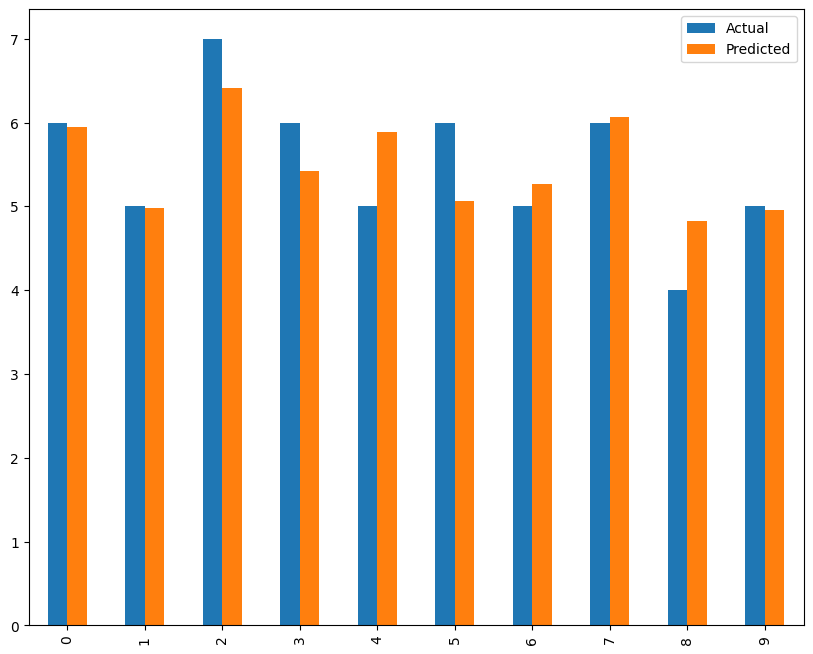

In [ ]:
s.plot(kind='bar',figsize=(10,8))

**Evaluate the Model:**

In [ ]:
print("mean absolute error", metrics.mean_absolute_error(y_test,y_pred))
print('mean squared error',metrics.mean_squared_error(y_test,y_pred))
print('r2 score',metrics.r2_score(y_test,y_pred))

mean absolute error 0.4879795661109293
mean squared error 0.4096570425100601
r2 score 0.2843930202485474


**Interpret the Results:**

In [ ]:
print("coefficient",regressor.coef_)
print("intercept",regressor.intercept_)

coefficient [[ 0.03543676 -1.34814989  0.32700295]]
intercept [2.66026164]


**`Regression Plot using Seaborn`**


> The regplot function from the Seaborn library creates a scatter plot with a linear regression line fit to the data points. It is to visualize relationships between variables and the associated regression line.



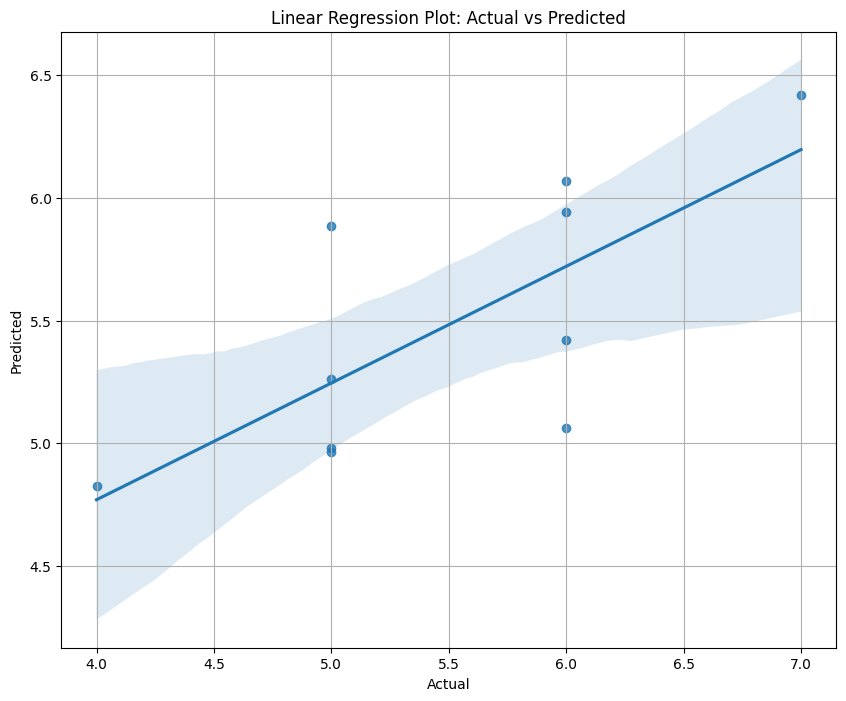

In [ ]:
import seaborn as sns
# Plotting the linear regression plot
plt.figure(figsize=(10, 8))
sns.regplot(x='Actual', y='Predicted', data=s )  # Using seaborn for regression plot
plt.title('Linear Regression Plot: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()

In [ ]:
# Take user input for new data
fixed_acidity = float(input("Enter fixed acidity: "))
volatile_acidity = float(input("Enter volatile acidity: "))
alcohol = float(input("Enter alcohol content: "))

# Create a NumPy array with the user input
user_input = [[fixed_acidity, volatile_acidity, alcohol]]

# Make a prediction using the trained model
predicted_quality = regressor.predict(user_input)

print(f"The predicted quality is: {predicted_quality}")

Enter fixed acidity: 7.4
Enter volatile acidity: 0.700
Enter alcohol content: 9.4
The predicted quality is: [[5.0526165]]
